In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Defining Path

In [3]:
dataset = 'model/keypoint_classifier/coord.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Alphabet Count

In [4]:
NUM_CLASSES = 27

# Dataset Reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model Building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 27)             │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,367 (5.34 KB)

 Trainable params: 1,367 (5.34 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
# es_callback = tf.keras.callbacks.EarlyStopping(patience=25, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Training

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback]
)

Epoch 1/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.0469 - loss: 3.3020
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0398 - loss: 3.3092 - val_accuracy: 0.0342 - val_loss: 3.2888
Epoch 2/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0234 - loss: 3.3068
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0522 - loss: 3.2908 - val_accuracy: 0.0342 - val_loss: 3.2815
Epoch 3/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0703 - loss: 3.2852
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0596 - loss: 3.2826 - val_accuracy: 0.0456 - val_loss: 3.2756
Epoch 4/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0781 - loss: 3.2693
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7726 - loss: 0.8260


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[2.7315684e-06 2.0541622e-04 3.8708460e-03 1.5980188e-05 1.7994716e-09
 3.1282914e-07 6.9957720e-09 5.6243416e-02 1.0293074e-03 1.5868201e-24
 1.3332873e-05 5.1215852e-07 7.0550912e-03 1.0124405e-03 4.4249005e-18
 3.4204611e-01 5.4019570e-01 1.7916267e-06 1.3278266e-04 5.3161981e-09
 1.8446813e-15 2.6271997e-13 1.0288075e-02 3.7886180e-02 4.6308978e-23
 6.9938204e-25 8.1706268e-23]
16


# Evaluation and Results

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    precision_recall_curve, 
    roc_curve, 
    auc
)
from sklearn.preprocessing import label_binarize

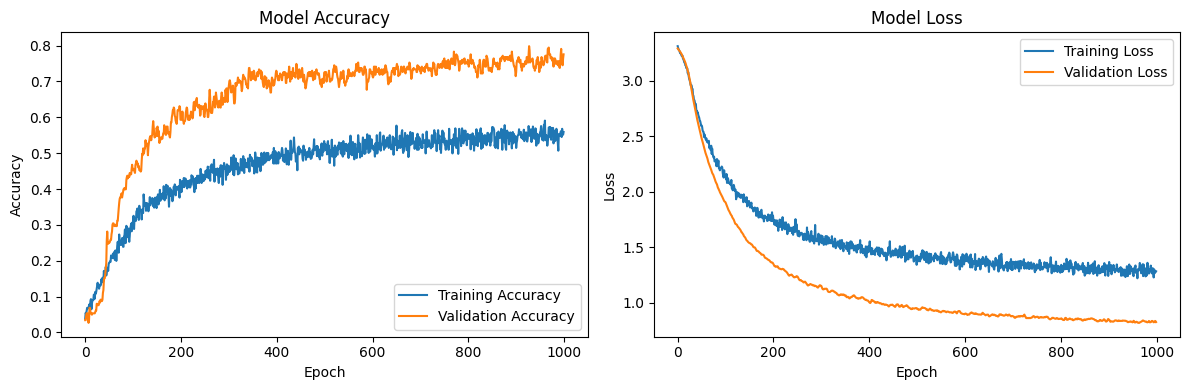

In [19]:
def plot_learning_curves(history):
    """
    Plot training and validation accuracy/loss curves
    """
    plt.figure(figsize=(12, 4))
    
    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.92      1.00      0.96        12
           2       0.82      0.50      0.62        18
           3       0.43      1.00      0.60         3
           4       0.88      0.58      0.70        12
           5       0.92      1.00      0.96        11
           6       0.95      0.95      0.95        21
           7       1.00      0.50      0.67        12
           8       1.00      0.11      0.20         9
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         7
          11       1.00      0.75      0.86        16
          12       1.00      0.56      0.71         9
          13       0.79      0.94      0.86        16
          14       0.45      1.00      0.62        10
          15       0.60      0.27      0.38        11
          1

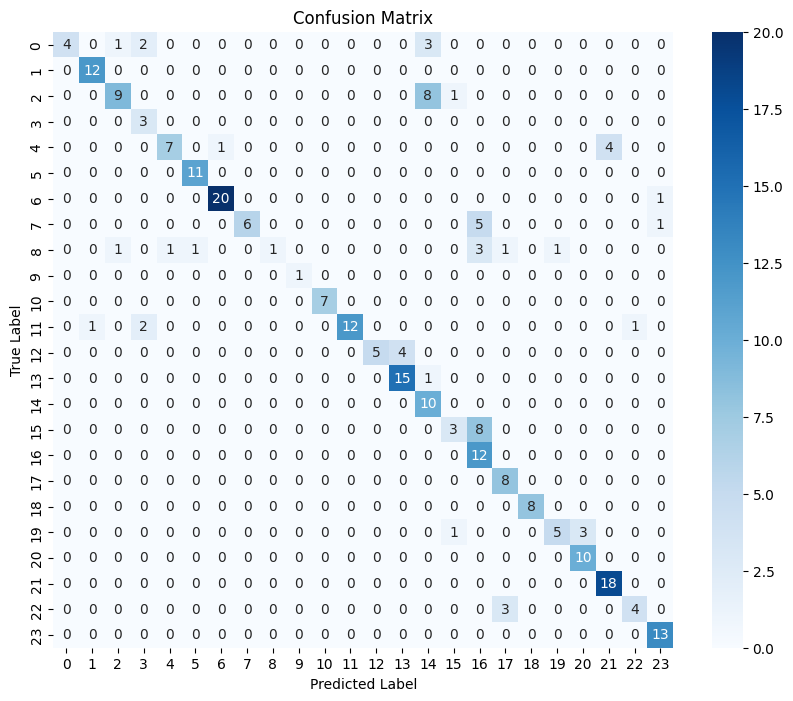

/Users/archit/Documents/College/Sign Language Translation using LLMs/Sign-Language-Translator/.venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/archit/Documents/College/Sign Language Translation using LLMs/Sign-Language-Translator/.venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/archit/Documents/College/Sign Language Translation using LLMs/Sign-Language-Translator/.venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


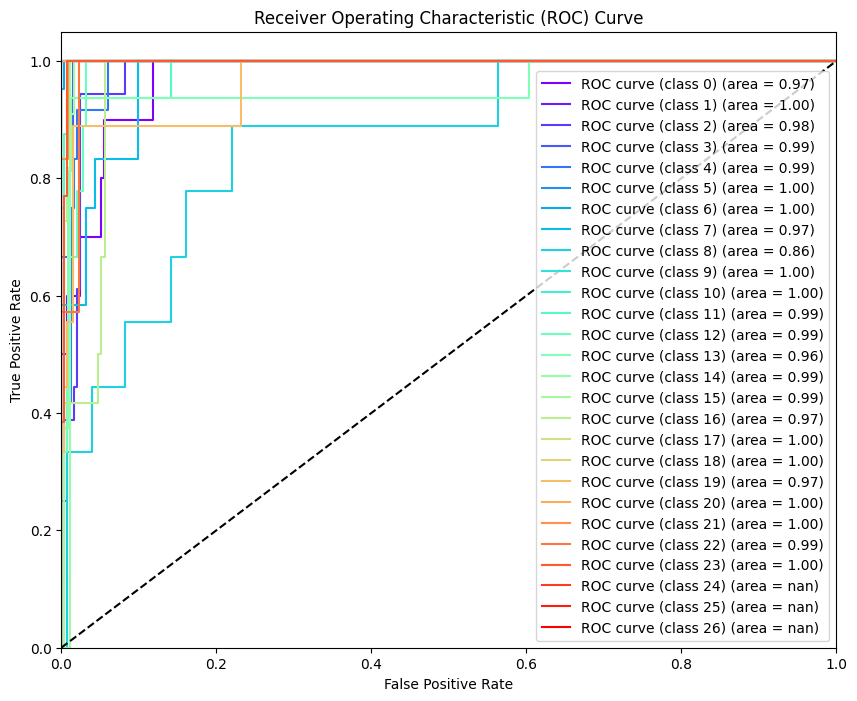

In [20]:
def plot_roc_curve(y_test, y_pred_proba, num_classes):
    """
    Plot ROC curves for multiclass classification
    """
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=range(num_classes))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    plt.figure(figsize=(10, 8))
    colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))
    
    for i, color in zip(range(num_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        plt.plot(fpr[i], tpr[i], color=color, 
                 label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def detailed_model_evaluation(model, X_test, y_test, num_classes=27):
    """
    Comprehensive model evaluation with multiple metrics and visualizations
    """
    # Predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Detailed Classification Report
    print("Detailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # ROC Curve
    plot_roc_curve(y_test, y_pred_proba, num_classes)

detailed_model_evaluation(model, X_test, y_test)

In [21]:
def model_performance_summary(model, X_test, y_test):
    """
    Compute and print key performance metrics
    """
    # Model Evaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

model_performance_summary(model, X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7685 - loss: 0.8313 
Test Loss: 0.8267
Test Accuracy: 0.7757


# Tensorflow-Lite

In [22]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [23]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/95/fqrtc6ld0nz26dr4swnjb71m0000gn/T/tmpgctarje5/assets


INFO:tensorflow:Assets written to: /var/folders/95/fqrtc6ld0nz26dr4swnjb71m0000gn/T/tmpgctarje5/assets


Saved artifact at '/var/folders/95/fqrtc6ld0nz26dr4swnjb71m0000gn/T/tmpgctarje5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  6210628320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6210633072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6210628848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5865745472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5865743008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5865750224: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1734385446.673627  688080 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1734385446.673808  688080 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-17 01:44:06.674266: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/95/fqrtc6ld0nz26dr4swnjb71m0000gn/T/tmpgctarje5
2024-12-17 01:44:06.674531: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-17 01:44:06.674535: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/95/fqrtc6ld0nz26dr4swnjb71m0000gn/T/tmpgctarje5
I0000 00:00:1734385446.677274  688080 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-12-17 01:44:06.677647: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-17 01:44:06.694488: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

7568

# Additional Steps

In [24]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [25]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [26]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [27]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 774 μs, sys: 802 μs, total: 1.58 ms
Wall time: 894 μs


In [28]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.7315727e-06 2.0541625e-04 3.8708521e-03 1.5980213e-05 1.7994746e-09
 3.1282903e-07 6.9957702e-09 5.6243476e-02 1.0293081e-03 1.5868136e-24
 1.3332881e-05 5.1215841e-07 7.0551024e-03 1.0124411e-03 4.4249162e-18
 3.4204599e-01 5.4019552e-01 1.7916295e-06 1.3278249e-04 5.3161964e-09
 1.8446808e-15 2.6271994e-13 1.0288086e-02 3.7886214e-02 4.6308972e-23
 6.9938194e-25 8.1706249e-23]
16
